In [1]:
import pandas as pd

In [48]:
df = pd.read_csv("orders_example.csv")
df

,order_id,customer_id,product,category,price,quantity,score,country,order_date
0,1001,C01,Laptop,Electronics,3500.0,1,95.0,Poland,2024-03-01
1,1002,C02,Mouse,Accessories,120.0,2,NaN,Germany,2024-03-03
2,1003,C03,Smartphone,Electronics,NaN,1,80.0,Poland,2024-03-07
3,1004,C04,Headphones,Accessories,450.0,1,89.0,France,2024-03-08
4,1005,C01,Monitor,Electronics,999.0,2,30.0,Poland,2024-03-10
5,1006,C05,Power Bank,Accessories,85.0,3,92.0,Czechia,2024-03-12


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     6 non-null      int64  
 1   customer_id  6 non-null      object 
 2   product      6 non-null      object 
 3   category     6 non-null      object 
 4   price        5 non-null      float64
 5   quantity     6 non-null      int64  
 6   score        5 non-null      float64
 7   country      6 non-null      object 
 8   order_date   6 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 564.0+ bytes


In [11]:
df.describe()

,order_id,price,quantity,score
count,6.000000,5.000000,6.000000,5.000000
mean,1003.500000,1030.800000,1.666667,77.200000
std,1.870829,1428.231669,0.816497,26.975915
min,1001.000000,85.000000,1.000000,30.000000
25%,1002.250000,120.000000,1.000000,80.000000
50%,1003.500000,450.000000,1.500000,89.000000
75%,1004.750000,999.000000,2.000000,92.000000
max,1006.000000,3500.000000,3.000000,95.000000


In [12]:
df['price']

0    3500.0
1     120.0
2       NaN
3     450.0
4     999.0
5      85.0
Name: price, dtype: float64

In [13]:
df['price'].fillna(df['price'].mean(), inplace=True)

In [50]:
# zalecana wersja
df['price'] = df['price'].fillna(df['price'].mean())

In [15]:
df['price']

0    3500.0
1     120.0
2    1030.8
3     450.0
4     999.0
5      85.0
Name: price, dtype: float64

In [16]:
df['score']

0    95.0
1     NaN
2    80.0
3    89.0
4    30.0
5    92.0
Name: score, dtype: float64

In [51]:
df['score'].fillna(df['score'].median(), inplace=True)

C:\Users\CSComarch\AppData\Local\Temp\ipykernel_6608\3156443114.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['score'].fillna(df['score'].median(), inplace=True)


In [18]:
df['score']

0    95.0
1    89.0
2    80.0
3    89.0
4    30.0
5    92.0
Name: score, dtype: float64

In [19]:
# zalecana wersja
df['score'] = df['score'].fillna(df['score'].median())

In [20]:
df['score']


0    95.0
1    89.0
2    80.0
3    89.0
4    30.0
5    92.0
Name: score, dtype: float64

In [21]:
df.describe()

,order_id,price,quantity,score
count,6.000000,6.00000,6.000000,6.000000
mean,1003.500000,1030.80000,1.666667,79.166667
std,1.870829,1277.44924,0.816497,24.604200
min,1001.000000,85.00000,1.000000,30.000000
25%,1002.250000,202.50000,1.000000,82.250000
50%,1003.500000,724.50000,1.500000,89.000000
75%,1004.750000,1022.85000,2.000000,91.250000
max,1006.000000,3500.00000,3.000000,95.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     6 non-null      int64  
 1   customer_id  6 non-null      object 
 2   product      6 non-null      object 
 3   category     6 non-null      object 
 4   price        6 non-null      float64
 5   quantity     6 non-null      int64  
 6   score        6 non-null      float64
 7   country      6 non-null      object 
 8   order_date   6 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 564.0+ bytes


wartości odstające IQR

In [23]:
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)

In [24]:
Q1

np.float64(82.25)

In [25]:
Q3

np.float64(91.25)

In [26]:
IQR = Q3 - Q1
IQR

np.float64(9.0)

In [27]:
outliers = df[df['score'] > Q3 + 1.5 * IQR]
outliers

,order_id,customer_id,product,category,price,quantity,score,country,order_date


In [31]:
median_score = df['score'].median()
df.loc[df['score'] > Q3 + 1.5 * IQR, "score"] = median_score
df

,order_id,customer_id,product,category,price,quantity,score,country,order_date
0,1001,C01,Laptop,Electronics,3500.0,1,95.0,Poland,2024-03-01
1,1002,C02,Mouse,Accessories,120.0,2,89.0,Germany,2024-03-03
2,1003,C03,Smartphone,Electronics,1030.8,1,80.0,Poland,2024-03-07
3,1004,C04,Headphones,Accessories,450.0,1,89.0,France,2024-03-08
4,1005,C01,Monitor,Electronics,999.0,2,30.0,Poland,2024-03-10
5,1006,C05,Power Bank,Accessories,85.0,3,92.0,Czechia,2024-03-12


In [52]:
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(9.0)

In [53]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"{Q1=}, {Q3=}, {IQR=}, Górna granica={upper_bound}")

Q1=np.float64(82.25), Q3=np.float64(91.25), IQR=np.float64(9.0), Górna granica=104.75


In [54]:
outliers = df[df['score'] > upper_bound]
print("Outliery:\n", outliers)

Outliery:
 Empty DataFrame
Columns: [order_id, customer_id, product, category, price, quantity, score, country, order_date]
Index: []


Wykres pudełkowy

In [36]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

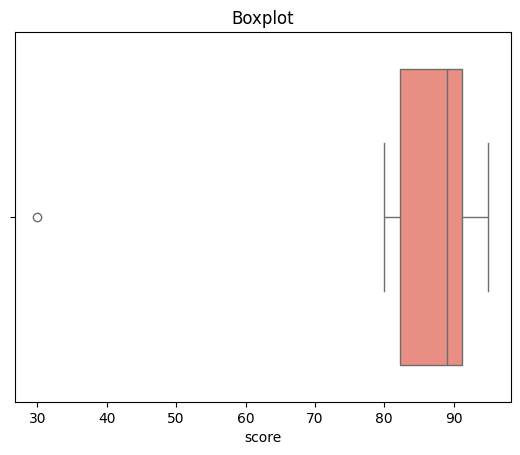

In [57]:
sns.boxplot(x=df['score'], color="salmon")
plt.title("Boxplot")
plt.show()

In [58]:
median_score = df['score'].median()
df.loc[df['score'] > upper_bound, "score"] = median_score

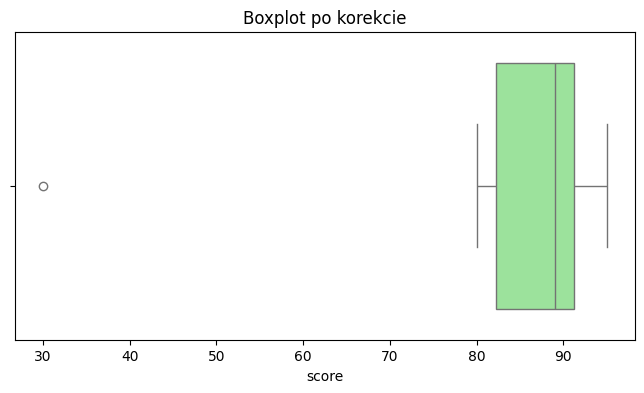

In [59]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['score'], color="lightgreen")
plt.title("Boxplot po korekcie")
plt.show()

In [60]:
quantiles = df['score'].quantile([0.25, 0.75])
print(quantiles)

0.25    82.25
0.75    91.25
Name: score, dtype: float64


In [61]:
Q1, Q3  =df['score'].quantile([0.25, 0.75])
print(f"{Q1=}, {Q3=}")

Q1=82.25, Q3=91.25


In [62]:
df.isnull().sum()

order_id       0
customer_id    0
product        0
category       0
price          0
quantity       0
score          0
country        0
order_date     0
dtype: int64

In [63]:
df.sort_values(by="order_date")

,order_id,customer_id,product,category,price,quantity,score,country,order_date
0,1001,C01,Laptop,Electronics,3500.0,1,95.0,Poland,2024-03-01
1,1002,C02,Mouse,Accessories,120.0,2,89.0,Germany,2024-03-03
2,1003,C03,Smartphone,Electronics,1030.8,1,80.0,Poland,2024-03-07
3,1004,C04,Headphones,Accessories,450.0,1,89.0,France,2024-03-08
4,1005,C01,Monitor,Electronics,999.0,2,30.0,Poland,2024-03-10
5,1006,C05,Power Bank,Accessories,85.0,3,92.0,Czechia,2024-03-12


In [64]:
df[(df['country'] == "Poland") & (df['score'] > 85)]

,order_id,customer_id,product,category,price,quantity,score,country,order_date
0,1001,C01,Laptop,Electronics,3500.0,1,95.0,Poland,2024-03-01


In [65]:
df.query("category == 'Electronics' and price > 1000")

,order_id,customer_id,product,category,price,quantity,score,country,order_date
0,1001,C01,Laptop,Electronics,3500.0,1,95.0,Poland,2024-03-01
2,1003,C03,Smartphone,Electronics,1030.8,1,80.0,Poland,2024-03-07


In [66]:
df.groupby('category').agg({"order_id": "count", "score": "mean"})

,order_id,score
category,,
Accessories,3,90.000000
Electronics,3,68.333333


In [68]:
df.pivot_table(values="price", index="country", aggfunc="mean")

,price
country,
Czechia,85.000000
France,450.000000
Germany,120.000000
Poland,1843.266667


In [69]:
df.groupby("country")['price'].mean()

country
Czechia      85.000000
France      450.000000
Germany     120.000000
Poland     1843.266667
Name: price, dtype: float64

In [70]:
dane = df.groupby('category').agg({"order_id": "count", "score": "mean"})
dane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Accessories to Electronics
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  2 non-null      int64  
 1   score     2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 48.0+ bytes
